In [1]:
import pandas as pd
import numpy as np

# Create time range (7 days hourly)
timestamps = pd.date_range(start="2025-01-01", periods=168, freq="H")

np.random.seed(42)

data = pd.DataFrame({
    "timestamp": timestamps,
    "energy_kwh": np.random.normal(loc=50, scale=5, size=168).round(2),
    "operating_hours": np.random.randint(1, 24, size=168),
    "temperature_c": np.random.normal(loc=30, scale=4, size=168).round(1),
    "vibration_level": np.random.normal(loc=3, scale=0.5, size=168).round(2)
})

# Simple maintenance logic
data["maintenance_flag"] = np.where(
    (data["energy_kwh"] > 60) & (data["vibration_level"] > 3.8),
    1,
    0
)

# Save to CSV
data.to_csv("equipment_energy_usage.csv", index=False)

data.head()


C:\Users\user\AppData\Local\Temp\ipykernel_24784\1337562251.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start="2025-01-01", periods=168, freq="H")


,timestamp,energy_kwh,operating_hours,temperature_c,vibration_level,maintenance_flag
0,2025-01-01 00:00:00,52.48,12,35.8,2.15,0
1,2025-01-01 01:00:00,49.31,19,24.3,2.97,0
2,2025-01-01 02:00:00,53.24,22,34.7,3.19,0
3,2025-01-01 03:00:00,57.62,23,30.0,2.98,0
4,2025-01-01 04:00:00,48.83,22,26.1,1.97,0


In [2]:
data.head(100)

,timestamp,energy_kwh,operating_hours,temperature_c,vibration_level,maintenance_flag
0,2025-01-01 00:00:00,52.48,12,35.8,2.15,0
1,2025-01-01 01:00:00,49.31,19,24.3,2.97,0
2,2025-01-01 02:00:00,53.24,22,34.7,3.19,0
3,2025-01-01 03:00:00,57.62,23,30.0,2.98,0
4,2025-01-01 04:00:00,48.83,22,26.1,1.97,0
...,...,...,...,...,...,...
95,2025-01-04 23:00:00,42.68,1,28.4,2.39,0
96,2025-01-05 00:00:00,51.48,8,30.9,2.67,0
97,2025-01-05 01:00:00,51.31,21,30.1,3.02,0
98,2025-01-05 02:00:00,50.03,12,30.4,2.57,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         168 non-null    datetime64[ns]
 1   energy_kwh        168 non-null    float64       
 2   operating_hours   168 non-null    int32         
 3   temperature_c     168 non-null    float64       
 4   vibration_level   168 non-null    float64       
 5   maintenance_flag  168 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1)
memory usage: 7.3 KB


In [4]:
data.describe()

,timestamp,energy_kwh,operating_hours,temperature_c,vibration_level,maintenance_flag
count,168,168.000000,168.000000,168.000000,168.000000,168.0
mean,2025-01-04 11:30:00,49.804643,12.630952,30.422619,2.950298,0.0
min,2025-01-01 00:00:00,36.900000,1.000000,21.500000,1.760000,0.0
25%,2025-01-02 17:45:00,46.615000,5.750000,27.600000,2.600000,0.0
50%,2025-01-04 11:30:00,49.980000,13.500000,30.350000,2.945000,0.0
75%,2025-01-06 05:15:00,52.635000,19.000000,32.825000,3.270000,0.0
max,2025-01-07 23:00:00,62.320000,23.000000,38.800000,4.540000,0.0
std,NaN,4.720937,7.261216,3.738418,0.489123,0.0


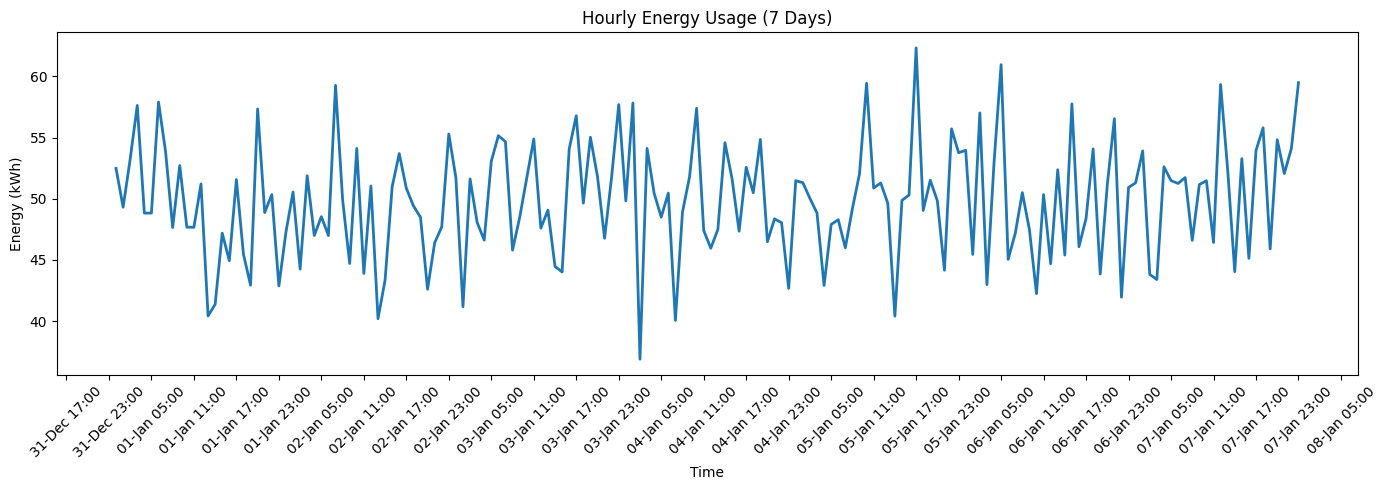

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplcursors

plt.figure(figsize=(14, 5))

line = plt.plot(
    data["timestamp"],
    data["energy_kwh"],
    linewidth=2
)[0]

plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.title("Hourly Energy Usage (7 Days)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)
plt.tight_layout()

# Tooltip (hover anywhere on the line)
cursor = mplcursors.cursor(line, hover=True)

@cursor.connect("add")
def on_add(sel):
    idx = sel.index
    row = data.iloc[idx]
    sel.annotation.set_text(
        f"Time: {row['timestamp']}\n"
        f"Energy: {row['energy_kwh']} kWh\n"
        f"Temp: {row['temperature_c']} °C\n"
        f"Operating Hrs: {row['operating_hours']}\n"
        f"Vibration: {row['vibration_level']}\n"
        f"Maintenance: {row['maintenance_flag']}"
    )

plt.show()


In [6]:
data.loc[data["energy_kwh"].idxmin()]


timestamp           2025-01-04 02:00:00
energy_kwh                         36.9
operating_hours                      16
temperature_c                      28.1
vibration_level                    2.88
maintenance_flag                      0
Name: 74, dtype: object

In [7]:
data.loc[data["energy_kwh"].idxmax()]


timestamp           2025-01-05 17:00:00
energy_kwh                        62.32
operating_hours                      18
temperature_c                      27.9
vibration_level                    2.92
maintenance_flag                      0
Name: 113, dtype: object

In [8]:
spike_row_max = data.loc[data["energy_kwh"].idxmax()]
spike_row_min = data.loc[data["energy_kwh"].idxmin()]

comparison = pd.DataFrame({
    "Normal_Average": data[["energy_kwh", "temperature_c", "operating_hours", "vibration_level"]].mean(),
    "Spike_Value_Max": spike_row_max[["energy_kwh", "temperature_c", "operating_hours", "vibration_level"]],
        "Spike_Value_Min": spike_row_min[["energy_kwh", "temperature_c", "operating_hours", "vibration_level"]]
})

comparison


,Normal_Average,Spike_Value_Max,Spike_Value_Min
energy_kwh,49.804643,62.32,36.9
temperature_c,30.422619,27.9,28.1
operating_hours,12.630952,18,16
vibration_level,2.950298,2.92,2.88


In [10]:
# Data Preperation using Isolation Forest 
from sklearn.ensemble import IsolationForest

# Select the column for anomaly detection
X = data[["energy_kwh"]]


In [11]:
# Training the anamoly detection model 
model = IsolationForest(
    contamination=0.05,   # assume ~5% data could be unusual
    random_state=42
)

model.fit(X)


,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [12]:
#Detect Anamoly
data["anomaly_flag"] = model.predict(X)
data["anomaly_flag"] = data["anomaly_flag"].map({1: "Normal", -1: "Anomaly"})
data[data["anomaly_flag"] == "Anomaly"]
print(data[data["anomaly_flag"] == "Anomaly"])

              timestamp  energy_kwh  operating_hours  temperature_c  \
14  2025-01-01 14:00:00       41.38                1           38.5   
31  2025-01-02 07:00:00       59.26               17           27.8   
37  2025-01-02 13:00:00       40.20               21           27.6   
49  2025-01-03 01:00:00       41.18               22           29.5   
74  2025-01-04 02:00:00       36.90               16           28.1   
79  2025-01-04 07:00:00       40.06               15           29.1   
113 2025-01-05 17:00:00       62.32               18           27.9   
125 2025-01-06 05:00:00       60.95                1           28.1   
167 2025-01-07 23:00:00       59.48               20           24.5   

     vibration_level  maintenance_flag anomaly_flag  
14              2.51                 0      Anomaly  
31              2.71                 0      Anomaly  
37              2.88                 0      Anomaly  
49              2.46                 0      Anomaly  
74              2.8

In [13]:
# We shall now give the model other monitoring factors 
features = [
    "energy_kwh",
    "temperature_c",
    "operating_hours",
    "vibration_level"
]

X_multi = data[features]


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)


In [15]:
from sklearn.ensemble import IsolationForest

model_multi = IsolationForest(
    contamination=0.05,
    random_state=42
)

model_multi.fit(X_scaled)


,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [16]:
data["contextual_anomaly"] = model_multi.predict(X_scaled)
data["contextual_anomaly"] = data["contextual_anomaly"].map(
    {1: "Normal", -1: "Anomaly"}
)


In [17]:
comparison = data[[
    "timestamp",
    "energy_kwh",
    "anomaly_flag",
    "contextual_anomaly"
]]

comparison


,timestamp,energy_kwh,anomaly_flag,contextual_anomaly
0,2025-01-01 00:00:00,52.48,Normal,Normal
1,2025-01-01 01:00:00,49.31,Normal,Normal
2,2025-01-01 02:00:00,53.24,Normal,Normal
3,2025-01-01 03:00:00,57.62,Normal,Normal
4,2025-01-01 04:00:00,48.83,Normal,Normal
...,...,...,...,...
163,2025-01-07 19:00:00,45.90,Normal,Normal
164,2025-01-07 20:00:00,54.82,Normal,Normal
165,2025-01-07 21:00:00,52.06,Normal,Normal
166,2025-01-07 22:00:00,54.11,Normal,Normal


In [18]:
data[data["contextual_anomaly"] == "Anomaly"]


,timestamp,energy_kwh,operating_hours,temperature_c,vibration_level,maintenance_flag,anomaly_flag,contextual_anomaly
14,2025-01-01 14:00:00,41.38,1,38.5,2.51,0,Anomaly,Anomaly
40,2025-01-02 16:00:00,53.69,3,29.1,4.54,0,Normal,Anomaly
53,2025-01-03 05:00:00,53.06,2,38.4,3.74,0,Normal,Anomaly
106,2025-01-05 10:00:00,59.43,15,33.5,1.76,0,Normal,Anomaly
123,2025-01-06 03:00:00,42.99,12,37.3,4.04,0,Normal,Anomaly
125,2025-01-06 05:00:00,60.95,1,28.1,2.84,0,Anomaly,Anomaly
126,2025-01-06 06:00:00,45.05,1,23.1,3.60,0,Normal,Anomaly
130,2025-01-06 10:00:00,42.25,16,23.6,2.06,0,Normal,Anomaly
167,2025-01-07 23:00:00,59.48,20,24.5,3.94,0,Anomaly,Anomaly


In [19]:
#Residual Based Anamoly Detection 
# We prepare by giving the model the inputs and the target
from sklearn.model_selection import train_test_split

X = data[["temperature_c", "operating_hours", "vibration_level"]]
y = data["energy_kwh"]


In [20]:
#We are training testing and spliting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
#Scaling is important because the factors lives in different scales it is simple yet it is imprortant 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# We shall use the linear regression model not because it is simple but it is honest
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [24]:
#Predicting the expected engery values 
data["predicted_energy"] = model.predict(
    scaler.transform(X)
)


In [26]:
#Finally we are calculating the residual Energy 
data["residual"] = data["energy_kwh"] - data["predicted_energy"]


In [28]:
#Defining what is unusual(when it deviates more than 2 standard deviations)
residual_std = data["residual"].std()

data["residual_anomaly"] = data["residual"].apply(
    lambda x: "Anomaly" if abs(x) > 2 * residual_std else "Normal"
)


In [29]:
#Now we are inputing the analmolies
data[data["residual_anomaly"] == "Anomaly"][
    ["timestamp", "energy_kwh", "predicted_energy", "residual"]
]


,timestamp,energy_kwh,predicted_energy,residual
31,2025-01-02 07:00:00,59.26,49.728001,9.531999
74,2025-01-04 02:00:00,36.90,49.750051,-12.850051
79,2025-01-04 07:00:00,40.06,49.687787,-9.627787
106,2025-01-05 10:00:00,59.43,49.326266,10.103734
113,2025-01-05 17:00:00,62.32,49.701636,12.618364
125,2025-01-06 05:00:00,60.95,50.236683,10.713317
156,2025-01-07 12:00:00,59.33,49.770371,9.559629
167,2025-01-07 23:00:00,59.48,49.943827,9.536173


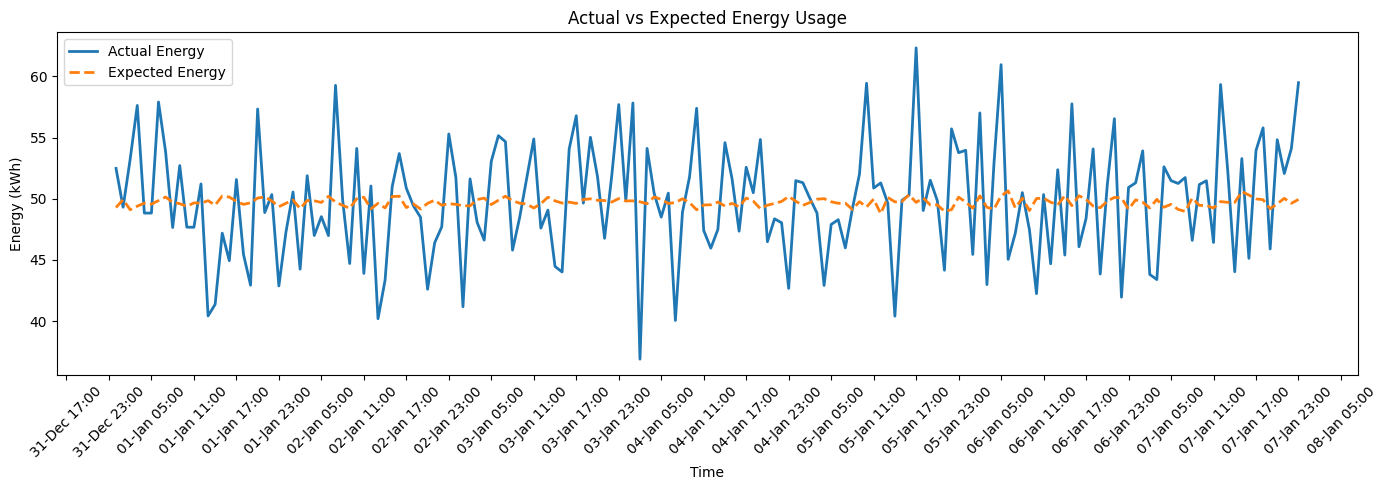

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 5))

plt.plot(
    data["timestamp"],
    data["energy_kwh"],
    label="Actual Energy",
    linewidth=2
)

plt.plot(
    data["timestamp"],
    data["predicted_energy"],
    label="Expected Energy",
    linestyle="--",
    linewidth=2
)

plt.xlabel("Time")
plt.ylabel("Energy (kWh)")
plt.title("Actual vs Expected Energy Usage")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


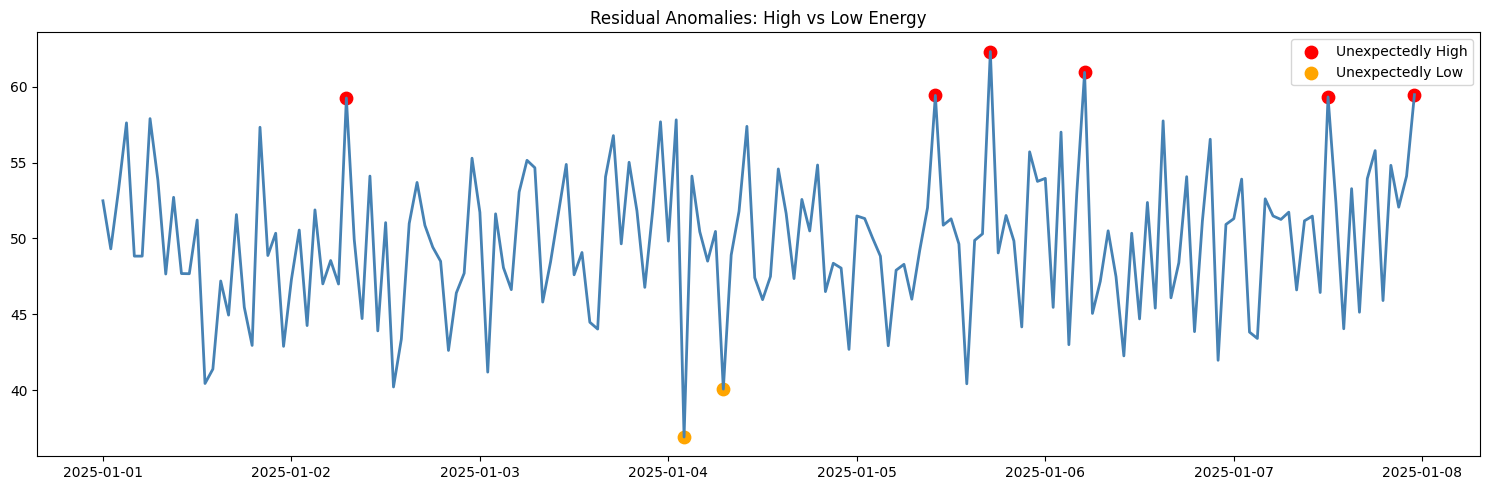

In [34]:
high = data[(data["residual_anomaly"] == "Anomaly") & (data["residual"] > 0)]
low  = data[(data["residual_anomaly"] == "Anomaly") & (data["residual"] < 0)]

plt.figure(figsize=(15, 5))

plt.plot(data["timestamp"], data["energy_kwh"], linewidth=2, color="steelblue")

plt.scatter(high["timestamp"], high["energy_kwh"],
            color="red", label="Unexpectedly High", s=80)

plt.scatter(low["timestamp"], low["energy_kwh"],
            color="orange", label="Unexpectedly Low", s=80)

plt.legend()
plt.title("Residual Anomalies: High vs Low Energy")
plt.tight_layout()
plt.show()


In [36]:
# Simple Priority Score formula 
data["priority_score"] = abs(data["residual"])

data.loc[data["residual"] > 0, "priority_score"] *= 1.5


In [ ]:
## Conclusion

This analysis demonstrated how residual-based modeling can reveal
unexpected energy behavior that may not be obvious through visual
inspection alone.

By prioritizing overload anomalies and contextualizing deviations,
this approach supports practical, decision-oriented energy monitoring.
